In [2]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install folium


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

response = requests.get(URL)

data = io.StringIO(response.text)

df = pd.read_csv(data)

print(df.head())


        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

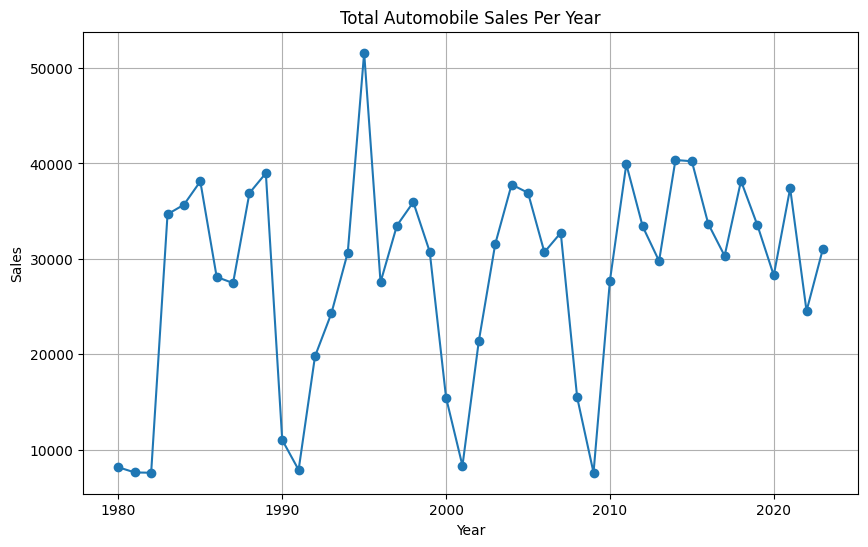

In [9]:
sales_by_year = df.groupby('Year')['Automobile_Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year['Year'], sales_by_year['Automobile_Sales'], marker='o')
plt.title('Total Automobile Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


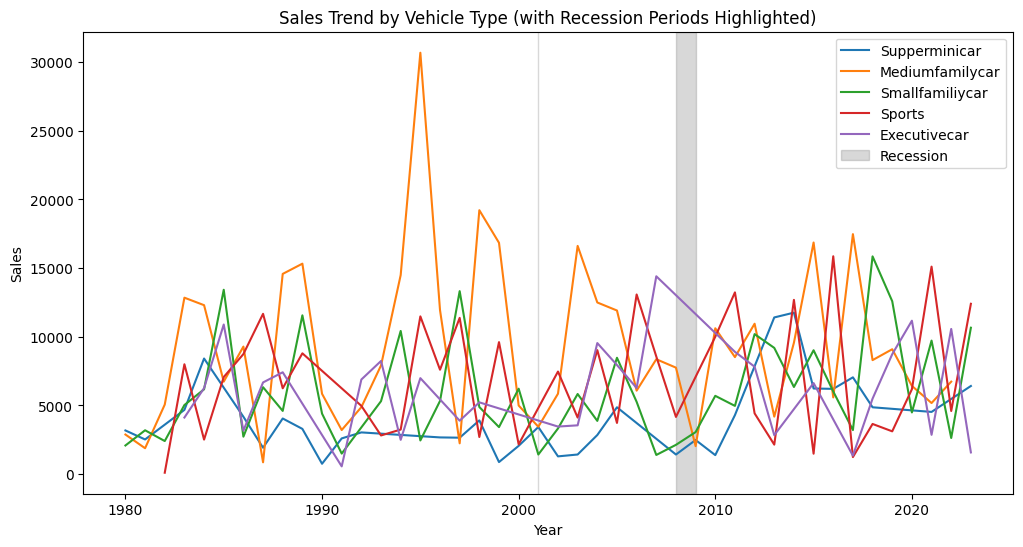

In [10]:
plt.figure(figsize=(12, 6))
for vt in df['Vehicle_Type'].unique():
    sales = df[df['Vehicle_Type'] == vt].groupby('Year')['Automobile_Sales'].sum()
    plt.plot(sales.index, sales.values, label=vt)
plt.axvspan(2001, 2001, color='gray', alpha=0.3, label='Recession')
plt.axvspan(2008, 2009, color='gray', alpha=0.3)
plt.title('Sales Trend by Vehicle Type (with Recession Periods Highlighted)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()


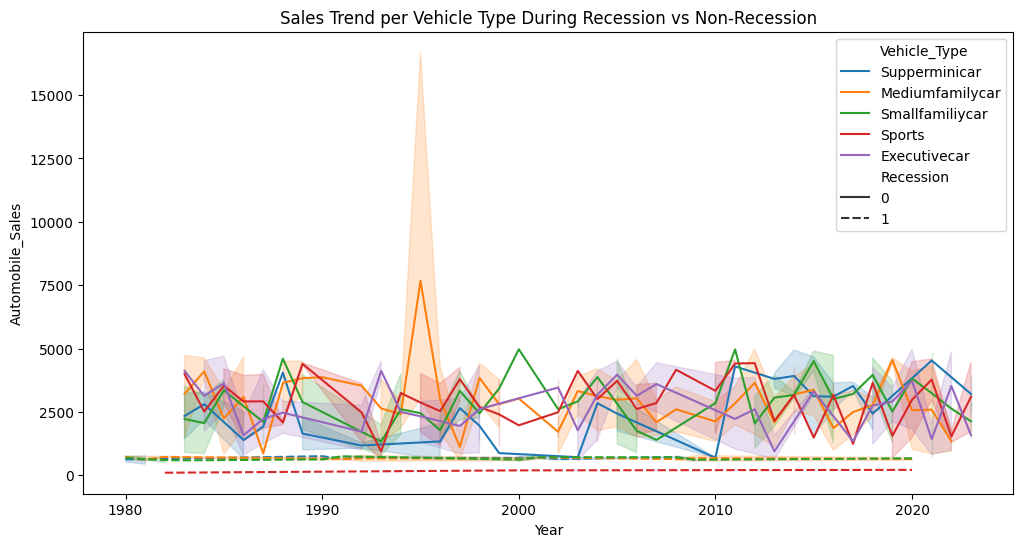

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession')
plt.title('Sales Trend per Vehicle Type During Recession vs Non-Recession')
plt.show()


In [13]:
print(df.head())

        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

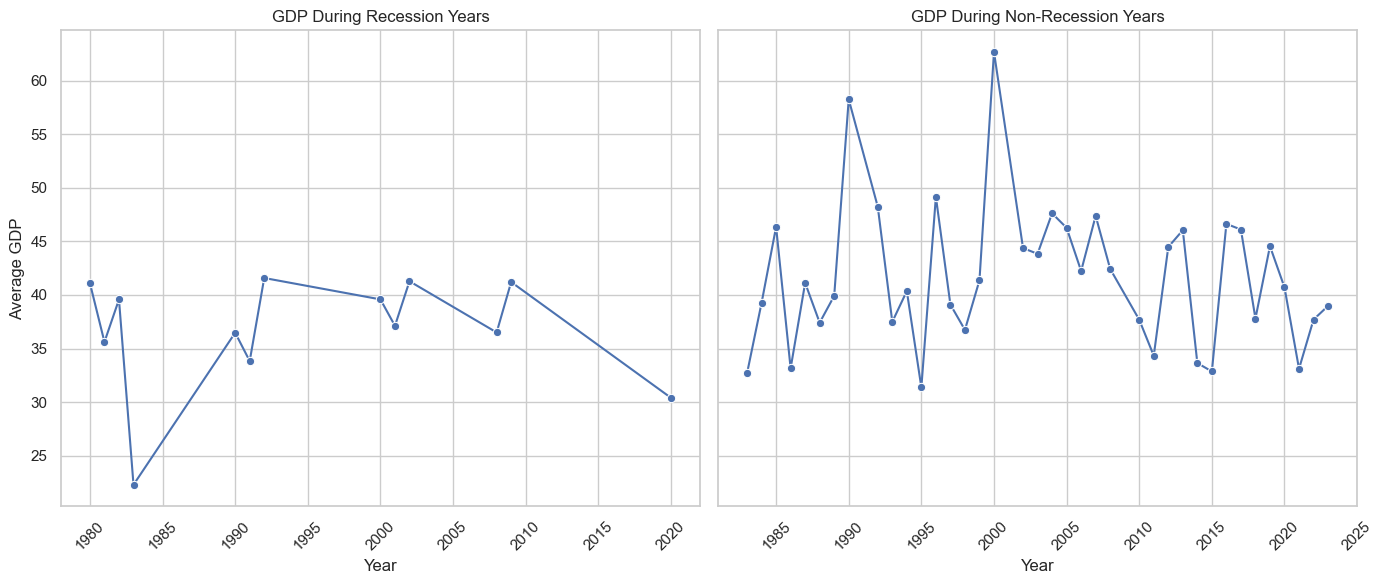

In [17]:
df['Recession'] = df['Recession'].astype(str)

sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.lineplot(
    data=df[df['Recession'] == '1'].groupby('Year')['GDP'].mean().reset_index(),
    x='Year', y='GDP', marker='o', ax=axs[0]
)
axs[0].set_title("GDP During Recession Years")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Average GDP")
axs[0].tick_params(axis='x', rotation=45)

sns.lineplot(
    data=df[df['Recession'] == '0'].groupby('Year')['GDP'].mean().reset_index(),
    x='Year', y='GDP', marker='o', ax=axs[1]
)
axs[1].set_title("GDP During Non-Recession Years")
axs[1].set_xlabel("Year")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

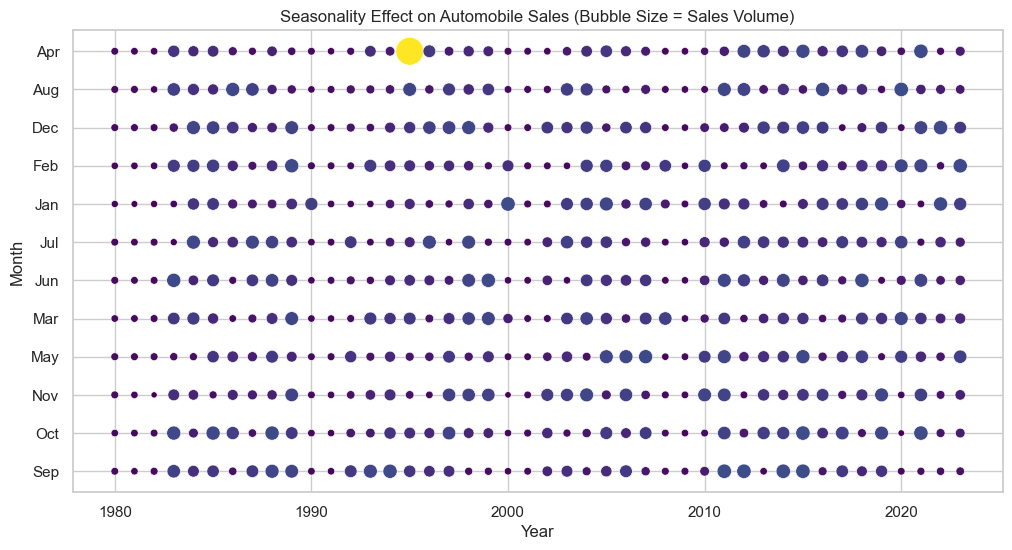

In [20]:
plt.figure(figsize=(12, 6))
bubble_data = df.groupby(['Year', 'Month'])['Automobile_Sales'].sum().reset_index()
size = bubble_data['Automobile_Sales'] / 10
sns.scatterplot(data=bubble_data, x='Year', y='Month', size=size, legend=False, sizes=(20, 400), hue='Automobile_Sales', palette='viridis')
plt.title('Seasonality Effect on Automobile Sales (Bubble Size = Sales Volume)')
plt.show()


In [27]:
yearly_avg_price = df.groupby('Year')['Price'].mean().rename('Avg_Vehicle_Price')

df = df.merge(yearly_avg_price, on='Year')

print(df[['Year', 'Price', 'Avg_Vehicle_Price']].head())


   Year      Price  Avg_Vehicle_Price
0  1980  27483.571         26479.7765
1  1980  24308.678         26479.7765
2  1980  28238.443         26479.7765
3  1980  32615.149         26479.7765
4  1980  23829.233         26479.7765


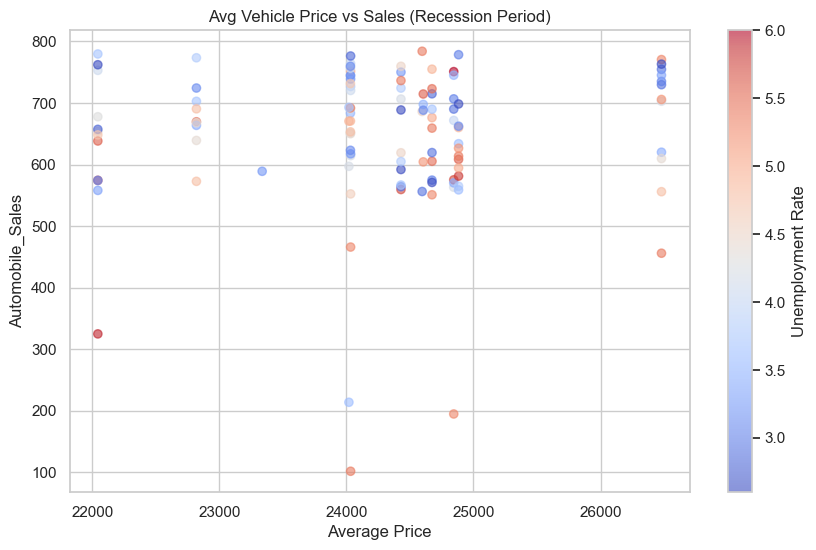

In [28]:
plt.figure(figsize=(10, 6))
recession_df = df[df['Recession'] == '1']
plt.scatter(recession_df['Avg_Vehicle_Price'], recession_df['Automobile_Sales'], alpha=0.6, c=recession_df['unemployment_rate'], cmap='coolwarm')
plt.colorbar(label='Unemployment Rate')
plt.title('Avg Vehicle Price vs Sales (Recession Period)')
plt.xlabel('Average Price')
plt.ylabel('Automobile_Sales')
plt.show()

In [29]:
print(df.head())

        Date  Year Month Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan         1               108.24                0.50   
1  2/29/1980  1980   Feb         1                98.75                0.75   
2  3/31/1980  1980   Mar         1               107.48                0.20   
3  4/30/1980  1980   Apr         1               115.01                1.00   
4  5/31/1980  1980   May         1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City  \
0  

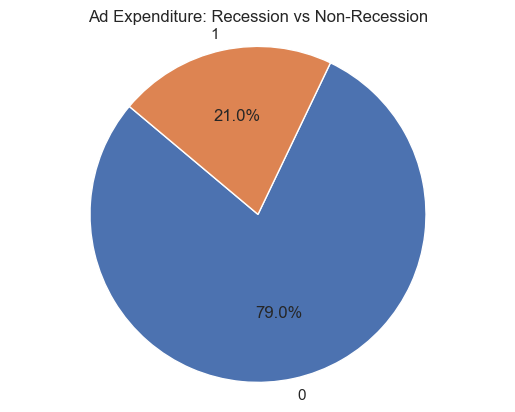

In [30]:
ad_exp = df.groupby('Recession')['Advertising_Expenditure'].sum()
plt.pie(ad_exp, labels=ad_exp.index, autopct='%1.1f%%', startangle=140)
plt.title('Ad Expenditure: Recession vs Non-Recession')
plt.axis('equal')
plt.show()


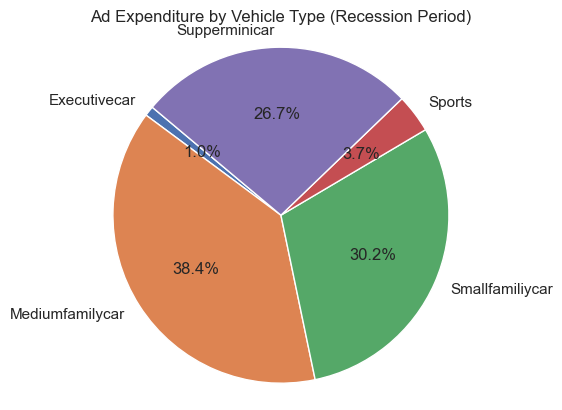

In [32]:
recession_ad = df[df['Recession'] == '1'].groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.pie(recession_ad, labels=recession_ad.index, autopct='%1.1f%%', startangle=140)
plt.title('Ad Expenditure by Vehicle Type (Recession Period)')
plt.axis('equal')
plt.show()


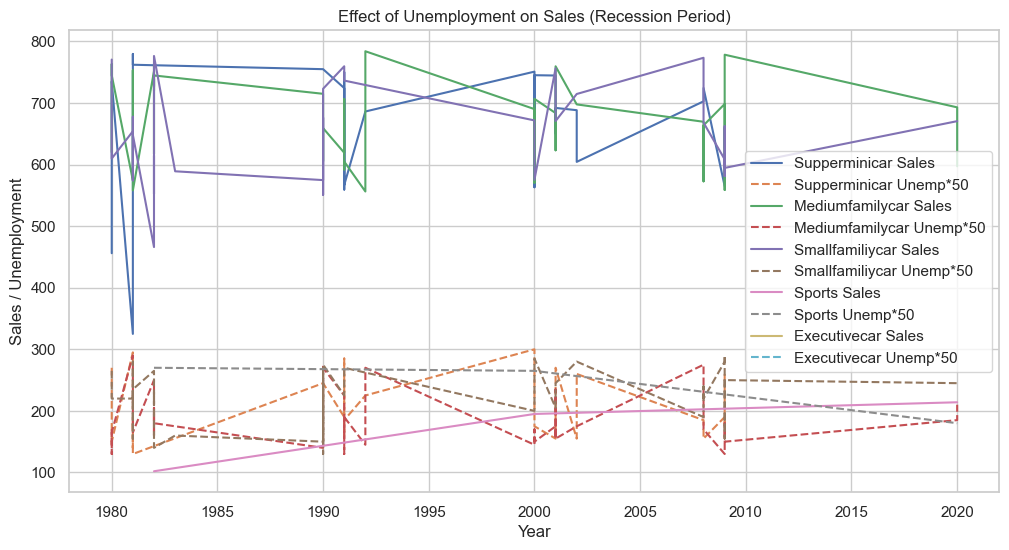

In [33]:
plt.figure(figsize=(12, 6))
for vt in df['Vehicle_Type'].unique():
    subset = df[(df['Vehicle_Type'] == vt) & (df['Recession'] == '1')]
    plt.plot(subset['Year'], subset['Automobile_Sales'], label=f'{vt} Sales')
    plt.plot(subset['Year'], subset['unemployment_rate'] * 50, linestyle='--', label=f'{vt} Unemp*50')

plt.title('Effect of Unemployment on Sales (Recession Period)')
plt.xlabel('Year')
plt.ylabel('Sales / Unemployment')
plt.legend()
plt.show()


# DASHBOARD

In [36]:
!pip install dash
import dash
from dash import html, dcc

app = dash.Dash(__name__)
app.title = "XYZAutomotives Sales Analytics Dashboard"

app.layout = html.Div([
    html.H1("XYZAutomotives Sales Analytics Dashboard", style={'textAlign': 'center'})
])

if __name__ == '__main__':
    app.run(debug=True)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import dash
from dash import html, dcc, Input, Output
import pandas as pd

app = dash.Dash(__name__)
app.title = "XYZAutomotives Sales Analytics Dashboard"

app.layout = html.Div([
    html.H1("XYZAutomotives Sales Analytics Dashboard", style={'textAlign': 'center'})
])

if __name__ == '__main__':
    app.run(debug=True)


df = pd.read_csv("automobile_data.csv")

app.layout = html.Div([
    html.H1("XYZAutomotives Sales Analytics Dashboard", style={'textAlign': 'center'}),

    html.Div(id='output-container', className='output-container', style={'marginTop': 20}),
    
    html.Div([
        html.Label("Select Recession Status:"),
        dcc.Dropdown(
            id='recession-dropdown',
            options=[{'label': rec, 'value': rec} for rec in df['Recession'].unique()],
            value='Yes'
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),

    html.Div([
        html.Label("Select Vehicle Type:"),
        dcc.Dropdown(
            id='vehicle-dropdown',
            options=[{'label': vt, 'value': vt} for vt in df['Vehicle_Type'].unique()],
            value='SUV'
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),

   
])

@app.callback(
        [Output('output-container', 'children'),
         Output('sales-graph', 'figure'),
         Output('ad-exp-graph', 'figure')],
        [Input('recession-dropdown', 'value'),
         Input('vehicle-dropdown', 'value')]
)
def update_output(recession, vehicle):
    return f"Showing statistics for {vehicle} vehicles during {'recession' if recession == 'Yes' else 'non-recession'} period."


In [53]:


# Save this as app.py

import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

df = pd.read_csv('automobile_data.csv')  # or use the simulated df above

app = dash.Dash(__name__)
app.title = "Automobile Sales Dashboard"

# App layout
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign': 'center'}),

    html.Div([
        html.Label("Select Recession Status:"),
        dcc.Dropdown(
            id='recession-dropdown',
            options=[
                {'label': 'Yes', 'value': 'Yes'},
                {'label': 'No', 'value': 'No'}
            ],
            value='Yes'
        )
    ], style={'width': '48%', 'display': 'inline-block'}),

    html.Div([
        html.Label("Select Vehicle Type:"),
        dcc.Dropdown(
            id='vehicle-dropdown',
            options=[{'label': vt, 'value': vt} for vt in df['Vehicle_Type'].unique()],
            value='Sedan'
        )
    ], style={'width': '48%', 'display': 'inline-block'}),

    html.Div(id='output-container', className='output-container'),

    dcc.Graph(id='sales-graph'),
    dcc.Graph(id='ad-exp-graph')
])

# Callbacks
@app.callback(
    [Output('output-container', 'children'),
     Output('sales-graph', 'figure'),
     Output('ad-exp-graph', 'figure')],
    [Input('recession-dropdown', 'value'),
     Input('vehicle-dropdown', 'value')]
)
def update_graph(recession, vehicle):
    filtered = df[(df['Recession'] == recession) & (df['Vehicle_Type'] == vehicle)]
    msg = f"Showing data for {vehicle} vehicles during {'a recession' if recession == 'Yes' else 'a non-recession'} period."

    fig1 = px.line(filtered, x='Year', y='Sales', title='Sales Over Years')
    fig2 = px.bar(filtered, x='Year', y='Ad_Expenditure', title='Ad Expenditure Over Years')

    return msg, fig1, fig2

if __name__ == '__main__':
    app.run(debug=True)
